Importing important libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
data = [train_df,test_df]

In [3]:
train_df.set_index(['ID'],inplace = True)
test_df.set_index(['ID'],inplace = True)

Description about data :

Target: Claim Status (Claim.Status)
Name of agency (Agency)
Type of travel insurance agencies (Agency.Type)
Distribution channel of travel insurance agencies (Distribution.Channel)
Name of the travel insurance products (Product.Name)
Duration of travel (Duration)- in no.of days
Destination of travel (Destination)
Amount of sales of travel insurance policies (Net.Sales)
The commission received for travel insurance agency (Commission)
Gender of insured (Gender)
Age of insured (Age)

In [4]:
train_df.isnull().sum()
test_df.isnull().sum()


Agency                     0
Agency Type                0
Distribution Channel       0
Product Name               0
Duration                   0
Destination                0
Net Sales                  0
Commision (in value)       0
Gender                  9061
Age                        0
dtype: int64

In [5]:
null_values = pd.DataFrame(train_df.isnull().sum(),columns=['total_count'])
round(null_values.loc[null_values['total_count'] > 0 , : ]['total_count']['Gender'] / len(train_df),2) * 100


71.0

In [6]:
train_df.drop(['Gender'],axis=1,inplace = True)
test_df.drop(['Gender'],axis=1,inplace = True)

EXPLORATORY ANALYSIS OF DATA

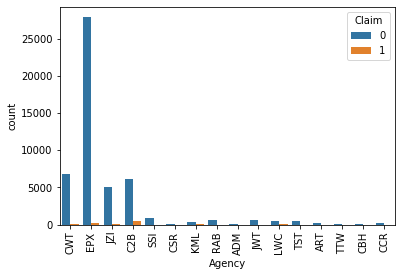

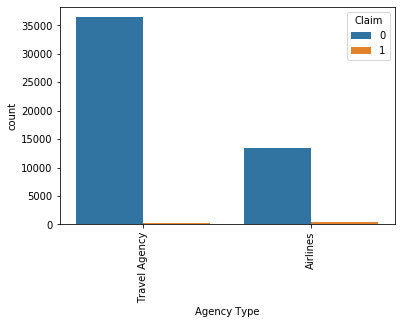

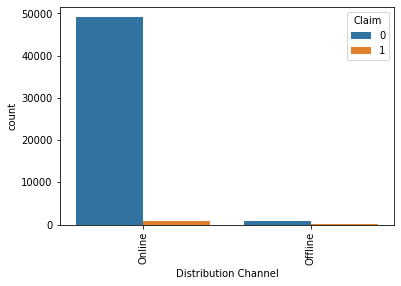

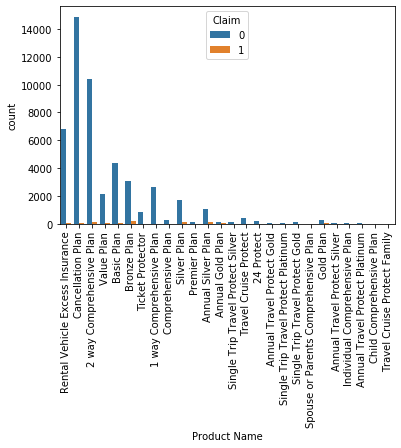

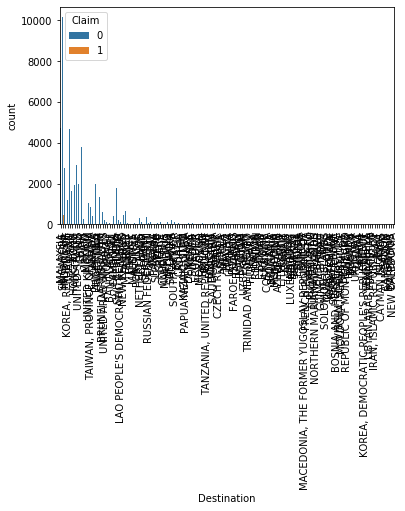

In [7]:
def bivariate_analysis_categorical(dataframe,target):
    cols = list(train_df)
    for col in cols:
        if col in dataframe.select_dtypes(exclude=np.number).columns:
            sns.countplot(x=dataframe[col],hue=target,data=dataframe)
            plt.xticks(rotation='vertical')
            plt.show()
bivariate_analysis_categorical(train_df,train_df['Claim']) 


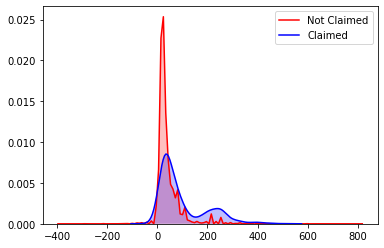

In [8]:
sns.kdeplot(train_df.loc[(train_df['Claim']==0),'Net Sales'],color='r',shade='True',Label='Not Claimed',legend = True)
sns.kdeplot(train_df.loc[(train_df['Claim']==1),'Net Sales'],color='b',shade='True',Label='Claimed',legend = True)
          

In [8]:
train_df['Agency'].unique()


array(['CWT', 'EPX', 'JZI', 'C2B', 'SSI', 'CSR', 'KML', 'RAB', 'ADM',
       'JWT', 'LWC', 'TST', 'ART', 'TTW', 'CBH', 'CCR'], dtype=object)

In [9]:
train_df['Agency'].nunique()


16

In [10]:
train_df['Agency Type'].unique()


array(['Travel Agency', 'Airlines'], dtype=object)

In [11]:
train_df['Distribution Channel'].unique()


array(['Online', 'Offline'], dtype=object)

In [12]:
train_df['Product Name'].nunique()


26

In [13]:
train_df['Product Name'].value_counts()


Cancellation Plan                       14926
2 way Comprehensive Plan                10501
Rental Vehicle Excess Insurance          6852
Basic Plan                               4383
Bronze Plan                              3246
1 way Comprehensive Plan                 2655
Value Plan                               2172
Silver Plan                              1789
Annual Silver Plan                       1156
Ticket Protector                          839
Travel Cruise Protect                     421
Comprehensive Plan                        293
Gold Plan                                 292
24 Protect                                199
Single Trip Travel Protect Gold           159
Premier Plan                              159
Annual Gold Plan                          148
Single Trip Travel Protect Silver         134
Annual Travel Protect Gold                 81
Annual Travel Protect Silver               73
Single Trip Travel Protect Platinum        59
Individual Comprehensive Plan     

In [14]:
train_df['Destination'].nunique()


144

In [15]:
train_df['Destination'].value_counts()


SINGAPORE                                 10608
MALAYSIA                                   4748
THAILAND                                   4699
CHINA                                      3836
AUSTRALIA                                  2934
INDONESIA                                  2786
UNITED STATES                              2018
PHILIPPINES                                1999
HONG KONG                                  1942
INDIA                                      1776
JAPAN                                      1636
VIET NAM                                   1357
KOREA, REPUBLIC OF                         1182
UNITED KINGDOM                             1040
TAIWAN, PROVINCE OF CHINA                   867
MYANMAR                                     653
BRUNEI DARUSSALAM                           615
NEW ZEALAND                                 441
CANADA                                      410
CAMBODIA                                    395
FRANCE                                  

In [16]:
train_df.groupby('Claim').mean()


,ID,Duration,Net Sales,Commision (in value),Age
Claim,,,,,
0,31585.275532,48.468989,40.013584,9.587209,40.029008
1,37674.203504,112.947439,96.256159,26.454367,38.610512


In [18]:
train_df['Age'].max()


118

In [9]:
for dataset in data:
    dataset.loc[(dataset['Age']>0)&(dataset['Age']<=20),'Age']=0
    dataset.loc[(dataset['Age']>20)&(dataset['Age']<=40),'Age']=1
    dataset.loc[(dataset['Age']>40)&(dataset['Age']<=60),'Age']=2
    dataset.loc[(dataset['Age']>60)&(dataset['Age']<=80),'Age']=3
    dataset.loc[(dataset['Age']>80)&(dataset['Age']<=100),'Age']=4
    dataset.loc[(dataset['Age']>100)&(dataset['Age']<=120),'Age']=5


In [10]:
def duration_months(size):
    a = ' '
    if (size >5)&(size <=90):
        a = '1-3 months'
    elif(size>90)&(size<=180):
        a = '4-6 months'
    elif(size>180)&(size<=270):
        a = '7-9 months'
    elif(size>270)&(size<=360):
        a = '10-12 months'
    elif(size>360)&(size<=450):
        a = '13-15 months'        
    elif(size>450)&(size<=540):
        a = '16-19months'
    elif(size>540)&(size<=630):
        a = '20-23 months'
    else:
        a = 'more than 2 years'
    return a

In [11]:
for dataset in data:
    dataset['Duration']=dataset.Duration.map(duration_months)


In [12]:
train_df.head(5)

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Age
ID,,,,,,,,,,
3433,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,1-3 months,MALAYSIA,0.0,17.82,1
4339,EPX,Travel Agency,Online,Cancellation Plan,0,1-3 months,SINGAPORE,69.0,0.00,1
34590,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,1-3 months,MALAYSIA,19.8,11.88,3
55816,EPX,Travel Agency,Online,2 way Comprehensive Plan,0,1-3 months,INDONESIA,20.0,0.00,1
13816,EPX,Travel Agency,Online,Cancellation Plan,0,1-3 months,"KOREA, REPUBLIC OF",15.0,0.00,1


In [13]:
n = 10
train_df['Destination'].value_counts().keys()[:n].tolist()

['SINGAPORE',
 'MALAYSIA',
 'THAILAND',
 'CHINA',
 'AUSTRALIA',
 'INDONESIA',
 'UNITED STATES',
 'PHILIPPINES',
 'HONG KONG',
 'INDIA']

In [14]:
for dataset in data :
    dest_mapping={'SINGAPORE':'A','MALAYSIA':'B','THAILAND':'C','CHINA':'D','AUSTRALIA':'E','INDONESIA':'F','UNITED STATES':'G','PHILIPPINES':'H','HONG KONG':'I','INDIA':'J'}
    dataset['Destination']=dataset['Destination'].map(dest_mapping)
    dataset.Destination.fillna('K',inplace = True)



In [15]:
train_df.head()

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Age
ID,,,,,,,,,,
3433,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,1-3 months,B,0.0,17.82,1
4339,EPX,Travel Agency,Online,Cancellation Plan,0,1-3 months,A,69.0,0.00,1
34590,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,1-3 months,B,19.8,11.88,3
55816,EPX,Travel Agency,Online,2 way Comprehensive Plan,0,1-3 months,F,20.0,0.00,1
13816,EPX,Travel Agency,Online,Cancellation Plan,0,1-3 months,K,15.0,0.00,1


In [16]:
train_df.Claim.value_counts()


0    49918
1      742
Name: Claim, dtype: int64

SPLITTING  TRAINING DATASET

In [17]:
X=train_df.drop('Claim',axis=1)
y=train_df['Claim']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.4,random_state=0)


OVERSAMPLING

In [18]:
from sklearn.utils import resample
trained = pd.concat([X_train,y_train],axis=1)
not_claimed_majority = pd.DataFrame(trained[trained.Claim == 0])
claimed_minority = pd.DataFrame(trained[trained.Claim == 1])
claim_0, claim_1 = trained.Claim.value_counts()
claim_upsampled = resample(claimed_minority,replace = True ,n_samples = claim_0,random_state = 27)
upsampled = pd.concat([not_claimed_majority,claim_upsampled])



In [19]:
upsampled.Claim.value_counts()


1    29949
0    29949
Name: Claim, dtype: int64

In [20]:
upsampled= pd.get_dummies(data=upsampled,columns=['Agency','Agency Type','Distribution Channel','Product Name','Destination','Duration'])
up_sampled=pd.DataFrame(upsampled)
#CREATED 'clean.csv' file of unsampled 
up_sampled.to_csv('clean.csv',index=False)
X=up_sampled.drop('Claim',axis=1)
y=up_sampled['Claim']

SPLIITING TRAINING SET TO CHECK USING TRUE VALUES AND PREDICTED VALUES

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.4,random_state=0)

In [22]:
X_train.head()

,Net Sales,Commision (in value),Age,Agency_ADM,Agency_ART,Agency_C2B,Agency_CBH,Agency_CCR,Agency_CSR,Agency_CWT,...,Destination_J,Destination_K,Duration_1-3 months,Duration_10-12 months,Duration_13-15 months,Duration_16-19months,Duration_20-23 months,Duration_4-6 months,Duration_7-9 months,Duration_more than 2 years
ID,,,,,,,,,,,,,,,,,,,,,
37914,17.00,4.25,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
26368,252.85,63.21,1,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
13315,10.00,0.00,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
57756,193.20,48.30,2,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
41192,20.00,0.00,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score,KFold


In [24]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))

In [25]:
results = []
names = []
seed = 7
scoring = 'accuracy'
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f " % (name, cv_results.mean())
    print(msg)

E:\mrunali\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\mrunali\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\mrunali\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\mrunali\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\mrunali\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarn

LR: 0.778730 


E:\mrunali\anaconda\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
E:\mrunali\anaconda\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
E:\mrunali\anaconda\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
E:\mrunali\anaconda\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
E:\mrunali\anaconda\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
E:\mrunali\anaconda\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
E:\mrunali\anaconda\lib\site-packages\sklearn\discri

LDA: 0.775057 
KNN: 0.892175 
CART: 0.913796 
NB: 0.734292 


In [26]:
from sklearn.tree import DecisionTreeClassifier
clf_gini = DecisionTreeClassifier(criterion = "gini",max_depth=30,min_samples_leaf=1, min_samples_split=5,random_state = 100)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=30,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

In [27]:
y_pred = clf_gini.predict(X_test)

In [28]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9178213689482471

In [29]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[10334,  1611],
       [  358, 11657]], dtype=int64)

In [30]:
test_df.head()

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age
ID,,,,,,,,,
25902,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,1-3 months,K,49.5,29.7,2
19535,EPX,Travel Agency,Online,2 way Comprehensive Plan,more than 2 years,A,20.0,0.0,1
43717,EPX,Travel Agency,Online,2 way Comprehensive Plan,1-3 months,K,20.0,0.0,1
48271,EPX,Travel Agency,Online,2 way Comprehensive Plan,1-3 months,D,28.0,0.0,1
52318,EPX,Travel Agency,Online,Cancellation Plan,1-3 months,A,11.0,0.0,1


In [31]:
test_df = pd.get_dummies(data=test_df,columns=['Agency','Agency Type','Distribution Channel','Product Name','Destination','Duration']) 

In [32]:
test_df.head()

,Net Sales,Commision (in value),Age,Agency_ADM,Agency_ART,Agency_C2B,Agency_CBH,Agency_CCR,Agency_CSR,Agency_CWT,...,Destination_I,Destination_J,Destination_K,Duration_1-3 months,Duration_10-12 months,Duration_13-15 months,Duration_16-19months,Duration_4-6 months,Duration_7-9 months,Duration_more than 2 years
ID,,,,,,,,,,,,,,,,,,,,,
25902,49.5,29.7,2,0,0,0,0,0,0,1,...,0,0,1,1,0,0,0,0,0,0
19535,20.0,0.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
43717,20.0,0.0,1,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
48271,28.0,0.0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
52318,11.0,0.0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [40]:
upsampled= pd.read_csv('clean.csv')
X=upsampled.drop('Claim',axis=1)
y=upsampled['Claim']


In [45]:
X.drop(['Duration_20-23 months'],axis=1,inplace = True)


In [46]:
from sklearn.tree import DecisionTreeClassifier
clf_gini = DecisionTreeClassifier(criterion = "gini",max_depth=30,min_samples_leaf=1, min_samples_split=10,random_state = 100)
clf_gini.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=30,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

In [49]:
prediction = clf_gini.predict(test_df)

In [52]:
submission = pd.DataFrame({"ID" :test_df.index.values.tolist(),"Claim":prediction})
submission.to_csv('submission.csv',index = False)
submission = pd.read_csv('submission.csv')



In [53]:
submission.head()

,ID,Claim
0,25902,0
1,19535,0
2,43717,0
3,48271,0
4,52318,0
